In [7]:
# Extracting DogVCat
from zipfile import ZipFile

dataset = './DogVCat.zip'

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    

In [6]:
import os

# Counting The Number Of Files In Cat And Dogs Folder
path, dirs, files = next(os.walk('./kagglecatsanddogs_3367a/PetImages/Cat'))
file_count = len(files)

path, dirs, files = next(os.walk('./kagglecatsanddogs_3367a/PetImages/Dog'))
file_count_2 = len(files)

print(f"Number Of Dog Images {file_count_2} And No. Of Cat Images {file_count}")

Number Of Dog Images 12470 And No. Of Cat Images 12491


In [5]:
# Printing The Name Of Images
file_names = os.listdir('./kagglecatsanddogs_3367a/PetImages/Cat')
# print(file_names)

Importing The Dependncies

In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2

Displaying The Images Of Dots And Cats

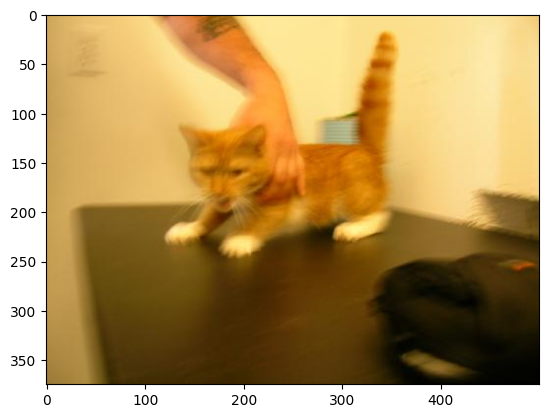

In [8]:
img = mpimg.imread('./kagglecatsanddogs_3367a/PetImages/Cat/0.jpg')
imgplt = plt.imshow(img)
plt.show()

Resizing All The Images

In [9]:
# Creating A Directory For Resized Images
os.mkdir('./img_resized')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: './img_resized'

In [ ]:
og_folder_cat = './kagglecatsanddogs_3367a/PetImages/Cat/'
og_folder_dog = './kagglecatsanddogs_3367a/PetImages/Dog/'

resized_folder = './img_resized/'

for i in range(2000):

    filename_cat = os.listdir(og_folder_cat)[i]
    img_path_cat = og_folder_cat + filename_cat

    img = Image.open(img_path_cat).convert('RGB')
    img= img.resize((224, 224))

    newImgPathCat = resized_folder+'_cat_'+filename_cat
    img.save(newImgPathCat)

    filename_dog = os.listdir(og_folder_dog)[i]
    img_path_dog = og_folder_dog + filename_dog

    img = Image.open(img_path_dog).convert('RGB')
    img= img.resize((224, 224))

    newImgPathDog = resized_folder+'_dog_'+filename_dog
    img.save(newImgPathDog)


(224, 224, 3)


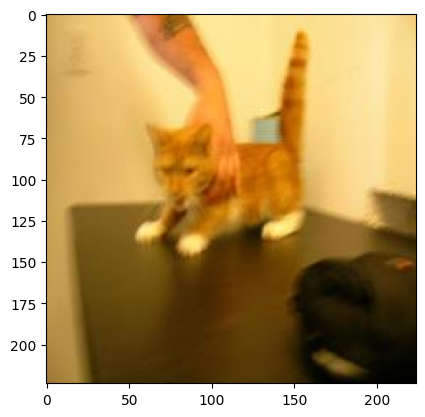

In [10]:
img = mpimg.imread('./img_resized/_cat_0.jpg')
print(img.shape)
imgplt = plt.imshow(img)
plt.show()

Creating Labels For Resized Images


In [11]:
# Cat -> 0
# Dog -> 1

In [12]:
# Creating A For Loop To Assign Labels

labels = []
filenames = os.listdir('./img_resized/')

for i in range(4000):

    file_name = filenames[i]
    label = file_name[1:4]

    if label == 'dog':
        labels.append(1)
    else:
        labels.append(0)

In [13]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [14]:
# Counting The Images Of Dogs And Cats Out Of 4000 Images
values, counts = np.unique(labels, return_counts = True)
print(values, counts)

[0 1] [2000 2000]


In [15]:
import glob

In [16]:
image_directory = './img_resized/'
image_extension = ['png', 'jpg', 'jpeg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]


dog_cat_images = np.asarray([cv2.imread(file) for file in files])
dog_cat_images

array([[[[ 87, 163, 205],
         [ 89, 165, 207],
         [ 92, 168, 210],
         ...,
         [124, 204, 245],
         [122, 202, 243],
         [122, 202, 243]],

        [[ 87, 163, 205],
         [ 89, 165, 207],
         [ 92, 168, 210],
         ...,
         [124, 204, 245],
         [123, 203, 244],
         [122, 202, 243]],

        [[ 87, 163, 205],
         [ 89, 165, 207],
         [ 92, 168, 210],
         ...,
         [124, 205, 243],
         [123, 203, 244],
         [123, 203, 244]],

        ...,

        [[ 54, 122, 159],
         [ 54, 122, 159],
         [ 55, 123, 160],
         ...,
         [  0,   2,   1],
         [  0,   2,   1],
         [  0,   2,   1]],

        [[ 53, 121, 158],
         [ 54, 122, 159],
         [ 54, 122, 159],
         ...,
         [  0,   2,   1],
         [  0,   2,   1],
         [  0,   2,   1]],

        [[ 53, 121, 158],
         [ 53, 121, 158],
         [ 54, 122, 159],
         ...,
         [  0,   2,   1],
        

In [17]:
print(dog_cat_images)

[[[[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 204 245]
   [122 202 243]
   [122 202 243]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 204 245]
   [123 203 244]
   [122 202 243]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 205 243]
   [123 203 244]
   [123 203 244]]

  ...

  [[ 54 122 159]
   [ 54 122 159]
   [ 55 123 160]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]

  [[ 53 121 158]
   [ 54 122 159]
   [ 54 122 159]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]

  [[ 53 121 158]
   [ 53 121 158]
   [ 54 122 159]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]]


 [[[ 40  39  35]
   [ 45  44  40]
   [ 46  45  41]
   ...
   [168 204 204]
   [160 201 203]
   [154 199 202]]

  [[ 42  41  37]
   [ 46  45  41]
   [ 46  45  41]
   ...
   [172 206 206]
   [161 202 204]
   [153 198 201]]

  [[ 44  43  39]
   [ 46  45  41]
   [ 45  44  40]
   ...
   [174 205 206]
   [162 201 203]
   [155 198

In [18]:
dog_cat_images.shape

(4000, 224, 224, 3)

In [19]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [21]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(3200, 224, 224, 3) (3200,) (800, 224, 224, 3) (800,)


3200 -> Training Images, 800 -> Testing Images

Scaling The Data

In [26]:
X_train_scaled = X_train/255
X_test_scaled = Y_train/255

MemoryError: Unable to allocate 3.59 GiB for an array with shape (3200, 224, 224, 3) and data type float64

Building The Neural Network

In [29]:
import tensorflow as tf
import tensorflow_hub as hub

In [31]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (224, 224, 3), trainable = False)

In [33]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [34]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['acc']
)

In [35]:
model.fit(X_train_scaled, Y_train, epochs = 5)

Epoch 1/5
100/100 [==============================] - 97s 934ms/step - loss: 0.6352 - acc: 0.6372
Epoch 2/5
100/100 [==============================] - 100s 1s/step - loss: 0.5537 - acc: 0.7244
Epoch 3/5
100/100 [==============================] - 102s 1s/step - loss: 0.5147 - acc: 0.7472
Epoch 4/5
 29/100 [=======>......................] - ETA: 53s - loss: 0.4946 - acc: 0.7619

: 

: 

In [ ]:
score, acc = model.evaluate(X_test, Y_test)
print('Test Loss = ', score)
print('Test Accuracy =', acc)

Predictive System

In [ ]:
input_image_path = input('Path Of The Image To Be Predicted')

input_image = cv2.imread(input_image_path)
cv2.imshow('Input Image', input_image)

input_image_resized = cv2.resize(input_image, (224, 224))

input_image_scaled = input_image_resized/255

image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

input_prediction = model.predict(image_reshaped)

input_pred_label - np.argmax(input_prediction)